# Analysing Employee Exit Survey

We will be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we will be looking at the previously stated datasets and try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- We want to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)
Let's start by reading the datasets into pandas and exploring them.

In [80]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


dete = pd.read_csv("dete_survey.csv")
tafe = pd.read_csv("tafe_survey.csv")

In [81]:
#function for ease
def explore(df):
    print(df.info())
    print("\n")
    print(df.head())
    print("\n")
    print(df.isnull())


In [82]:
explore(tafe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In the 'tafe' dataset, there are 702 rows and 72 columns. many of these columns have missing values. We will plot the null graph to visualize this better.

## Visualizing Missing Data

<AxesSubplot:>

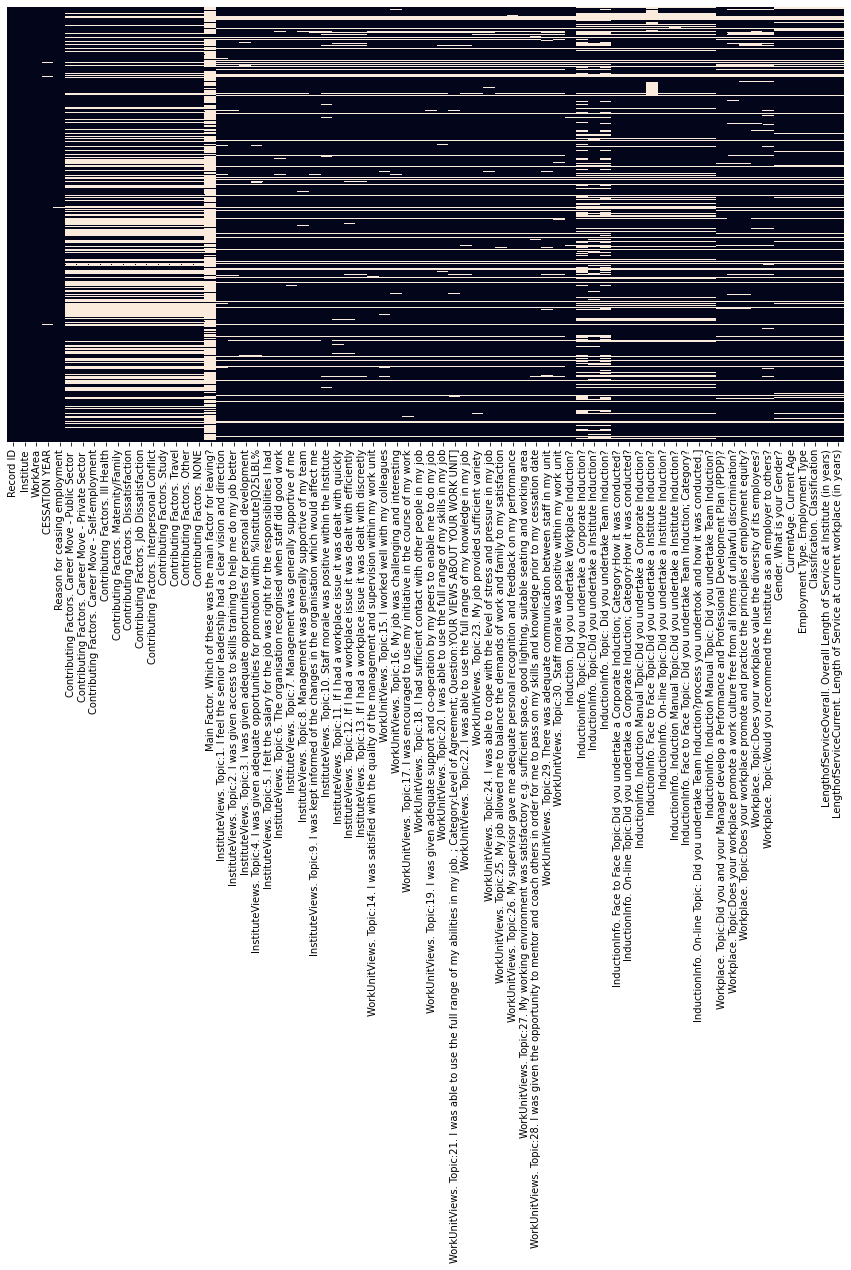

In [83]:
plt.figure(figsize=(15,8))
tafe_null = tafe.isnull()
sns.heatmap(~tafe_null, yticklabels=False, cmap='rocket_r', cbar=False)


In [84]:
explore(dete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [85]:
dete['DETE Start Date'].value_counts(dropna=False)

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
2013          21
1975          21
1970          21
2005          20
1990          20
1996          19
1999          19
1991          18
2004          18
2000          18
1992          18
1989          17
2003          15
2002          15
1976          15
1988          15
1978          15
1979          14
1998          14
1974          14
1980          14
1997          14
1995          14
1993          13
1972          12
1986          12
1977          11
1984          10
1971          10
1994          10
2001          10
1969          10
1983           9
1981           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64


The 'dete' dataset too has a lot of missing values. What's more, some columns without NaN values have 'Not Stated' which also implies the same thing.

<AxesSubplot:>

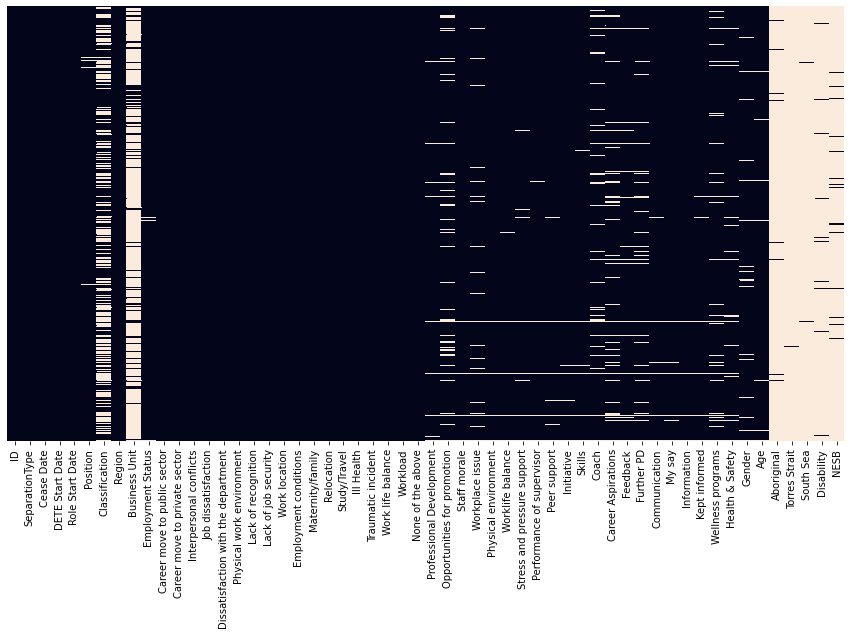

In [86]:
plt.figure(figsize=(15,8))
dete_null = dete.isnull()
sns.heatmap(~dete_null, yticklabels=False, cmap='rocket_r', cbar=False)


## Dropping unneeded columns
Fortunately for us, many of the columns with missing data are unneeded to achieve our goals. We will drop these columns. We will also read in the dete_survey csv file again but this time, set na_values as 'Not Stated'.

In [87]:
dete = pd.read_csv("dete_survey.csv", na_values='Not Stated')

In [88]:
dete['DETE Start Date'].value_counts(dropna=False)

NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
1975.0    21
2013.0    21
2005.0    20
1990.0    20
1999.0    19
1996.0    19
1992.0    18
1991.0    18
2000.0    18
2004.0    18
1989.0    17
1978.0    15
2003.0    15
1988.0    15
1976.0    15
2002.0    15
1974.0    14
1997.0    14
1998.0    14
1979.0    14
1995.0    14
1980.0    14
1993.0    13
1972.0    12
1986.0    12
1977.0    11
1971.0    10
1984.0    10
1994.0    10
1969.0    10
2001.0    10
1983.0     9
1981.0     9
1973.0     8
1985.0     8
1987.0     7
1982.0     4
1963.0     4
1968.0     3
1967.0     2
1965.0     1
1966.0     1
Name: DETE Start Date, dtype: int64

In [89]:
dete_updated = dete.drop(dete.columns[28:49], axis=1)
len(dete_updated.columns)

35

In [90]:
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)
len(tafe_updated.columns)

23

## Renaming Columns

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey     | tafe_survey                                                                     | Definition                                              |
|-----------------|---------------------------------------------------------------------------------|---------------------------------------------------------|
| ID              | Record ID                                                                       | An id used to identify the participant of the survey    |
| SeparationType  | Reason for ceasing<br>employment                                                | The reason why the participant's employment ended       |
| Cease Date      | CESSATION YEAR                                                                  | The year or month the participant's employment ended    |
| DETE Start Date |                                                                                 | The year the participant began employment with the DETE |
|                 | LengthofServiceOverall.<br>Overall Length of Service<br>at Institute (in years) | The length of the person's employment (in years)        |
| Age             | CurrentAge.<br>Current Age                                                      | The age of the participant                              |
| Gender          | Gender.<br>What is your Gender?                                                 | The gender of the participant                           |

Because we eventually want to combine them, we'll have to standardize the column names.

In [91]:
dete_updated.columns = dete_updated.columns.str.lower().str.replace(" ", "_")
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [92]:
mapp = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_updated = tafe_updated.rename(mapp, axis = 1)
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [93]:
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [94]:
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.

## Filtering Date

In [103]:
dete_updated['separationtype'] = dete_updated['separationtype'].str.split("-").str[0]

In [104]:
dete_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [112]:
dete_resignation = dete_updated[dete_updated['separationtype']=='Resignation'].copy()
tafe_resignation = tafe_updated[tafe_updated['separationtype']=='Resignation'].copy()

Above, we see that the 'dete_updated' column as three different categories where 'separationtype' contains 'Resignation. We have accounted for this three categories and isolated rows bearing them into another dataframe--dete_resignation.
We've also done the same to the tefe_updated dataframe.

## Verify dates
Below, we clean and explore the cease_date and dete_start_date columns to make sure all of the years make sense. We'll use the following criteria:

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [113]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [114]:
# Extract the years and convert them to a float type
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

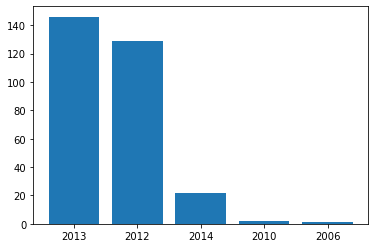

In [122]:
plt.bar(['2013', '2012', '2014', '2010', '2006'], height=[146, 129, 22, 2, 1])
plt.show()

In [116]:
# Check the unique values and look for outliers
dete_resignation['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [135]:
# Check the unique values
tafe_resignation['cease_date'].value_counts().sort_values()

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

The years in both dataframes don't completely align. The `tafe_updated` dataframe contains some cease dates in 2009, but the `dete_updated` dataframe does not. The `tafe_supdated` dataframe also contains many more cease dates in 2010 than the `dete_updaed` dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

## Creating a new column
We will need to estimate the number pf years each individual worked for for the purpose of our goal. This means we have to subtract their start date from their cease dates.

In [136]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

In [179]:
dete_resignation['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Dissatisfied Employees
Keeping our end goal in mind:
**End goal: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We will categorize employees who resigned using the columns below from each dataframe:

tafe_survey_updated:

 `Contributing Factors. Dissatisfaction
 Contributing Factors. Job Dissatisfaction`
 
dafe_survey_updated:

`job_dissatisfaction
 dissatisfaction_with_the_department
 physical_work_environment
 lack_of_recognition
 lack_of_job_security
 work_location
 employment_conditions
 work_life_balance
 workload`
 
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. After our changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [142]:
def update_vals(x):
    import numpy as np
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignation_up = tafe_resignation.copy()

# Check the unique values after the updates
tafe_resignation_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [143]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignation_up = dete_resignation.copy()
dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, we've coded and created a boolean column indicating whether an employee who resigned was dissatisfied.

## Combinig Dataframes

Below, we'll add an institute column so that we can differentiate the data from each survey after we combine them. Then, we'll combine the dataframes and drop any remaining columns we don't need.

In [172]:
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

In [173]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True)

In [174]:
combined['institute']


0      DETE
1      DETE
2      DETE
3      DETE
4      DETE
       ... 
646    TAFE
647    TAFE
648    TAFE
649    TAFE
650    TAFE
Name: institute, Length: 651, dtype: object

In [175]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

### Clean the Service Column

Next, we'll clean the institute_service column and categorize employees according to the following definitions:

New: Less than 3 years in the workplace

Experienced: 3-6 years in the workplace

Established: 7-10 years in the workplace

Veteran: 11 or more years in the workplace

In [176]:
combined_updated['institute_service'].value_counts(dropna=False)


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [180]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

We'll now group the values into the categorizes stated above.

In [182]:
# Convert years of service to categories
def transform_service(val):
    import numpy as np
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## More Likely to Resign

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value, False. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each service_cat group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [185]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


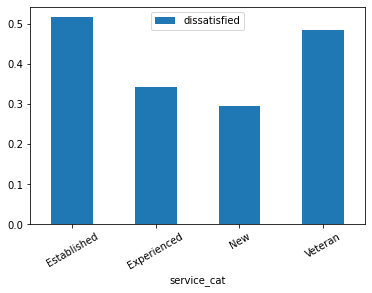

In [191]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc='mean')

# Plot the results

dis_pct.plot(kind='bar', rot=30)


From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.